In [60]:
import pandas as pd
import numpy as np

In [61]:
df = pd.read_csv('data/processed_data.csv')

In [62]:
df.columns

Index(['id', 'loanAmnt', 'term', 'interestRate', 'installment', 'grade',
       'subGrade', 'employmentTitle', 'employmentLength', 'homeOwnership',
       'annualIncome', 'verificationStatus', 'issueDate', 'purpose',
       'postCode', 'regionCode', 'dti', 'delinquency_2years', 'ficoRangeLow',
       'ficoRangeHigh', 'openAcc', 'pubRec', 'pubRecBankruptcies', 'revolBal',
       'revolUtil', 'totalAcc', 'initialListStatus', 'applicationType',
       'earliesCreditLine', 'title', 'policyCode', 'n0', 'n1', 'n2', 'n3',
       'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n11', 'n12', 'n13', 'n14',
       'source'],
      dtype='object')

In [63]:
df.head()

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,...,n6,n7,n8,n9,n10,n11,n12,n13,n14,source
0,0,35000.0,5,19.52,917.97,4,21,320.0,2,2,...,8.000000,4.000000,12.000000,2.000000,7.0,0.000000,0.000000,0.000000,2.000000,1
1,1,18000.0,5,18.49,461.90,3,16,219843.0,5,0,...,8.566264,8.281331,14.616502,5.593135,13.0,0.000818,0.003431,0.089161,2.178948,1
2,2,12000.0,5,16.99,298.17,3,17,31698.0,8,0,...,21.000000,4.000000,5.000000,3.000000,11.0,0.000000,0.000000,0.000000,4.000000,1
3,3,11000.0,3,7.26,340.96,0,3,46854.0,1,1,...,4.000000,7.000000,21.000000,6.000000,9.0,0.000000,0.000000,0.000000,1.000000,1
4,4,3000.0,3,12.99,101.07,2,11,54.0,1,1,...,9.000000,10.000000,15.000000,7.000000,12.0,0.000000,0.000000,0.000000,4.000000,1


In [64]:
df.shape

(1000000, 47)

In [65]:
train = pd.read_csv('data/train.csv')

In [66]:
test = pd.read_csv('data/testA.csv')

In [67]:
train.shape, test.shape

((800000, 47), (200000, 46))

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'loanAmnt'}>,
        <Axes: title={'center': 'term'}>,
        <Axes: title={'center': 'interestRate'}>,
        <Axes: title={'center': 'installment'}>,
        <Axes: title={'center': 'grade'}>,
        <Axes: title={'center': 'subGrade'}>],
       [<Axes: title={'center': 'employmentTitle'}>,
        <Axes: title={'center': 'employmentLength'}>,
        <Axes: title={'center': 'homeOwnership'}>,
        <Axes: title={'center': 'annualIncome'}>,
        <Axes: title={'center': 'verificationStatus'}>,
        <Axes: title={'center': 'issueDate'}>,
        <Axes: title={'center': 'purpose'}>],
       [<Axes: title={'center': 'postCode'}>,
        <Axes: title={'center': 'regionCode'}>,
        <Axes: title={'center': 'dti'}>,
        <Axes: title={'center': 'delinquency_2years'}>,
        <Axes: title={'center': 'ficoRangeLow'}>,
        <Axes: title={'center': 'ficoRangeHigh'}>,
        <Axes: title={'center': 'o

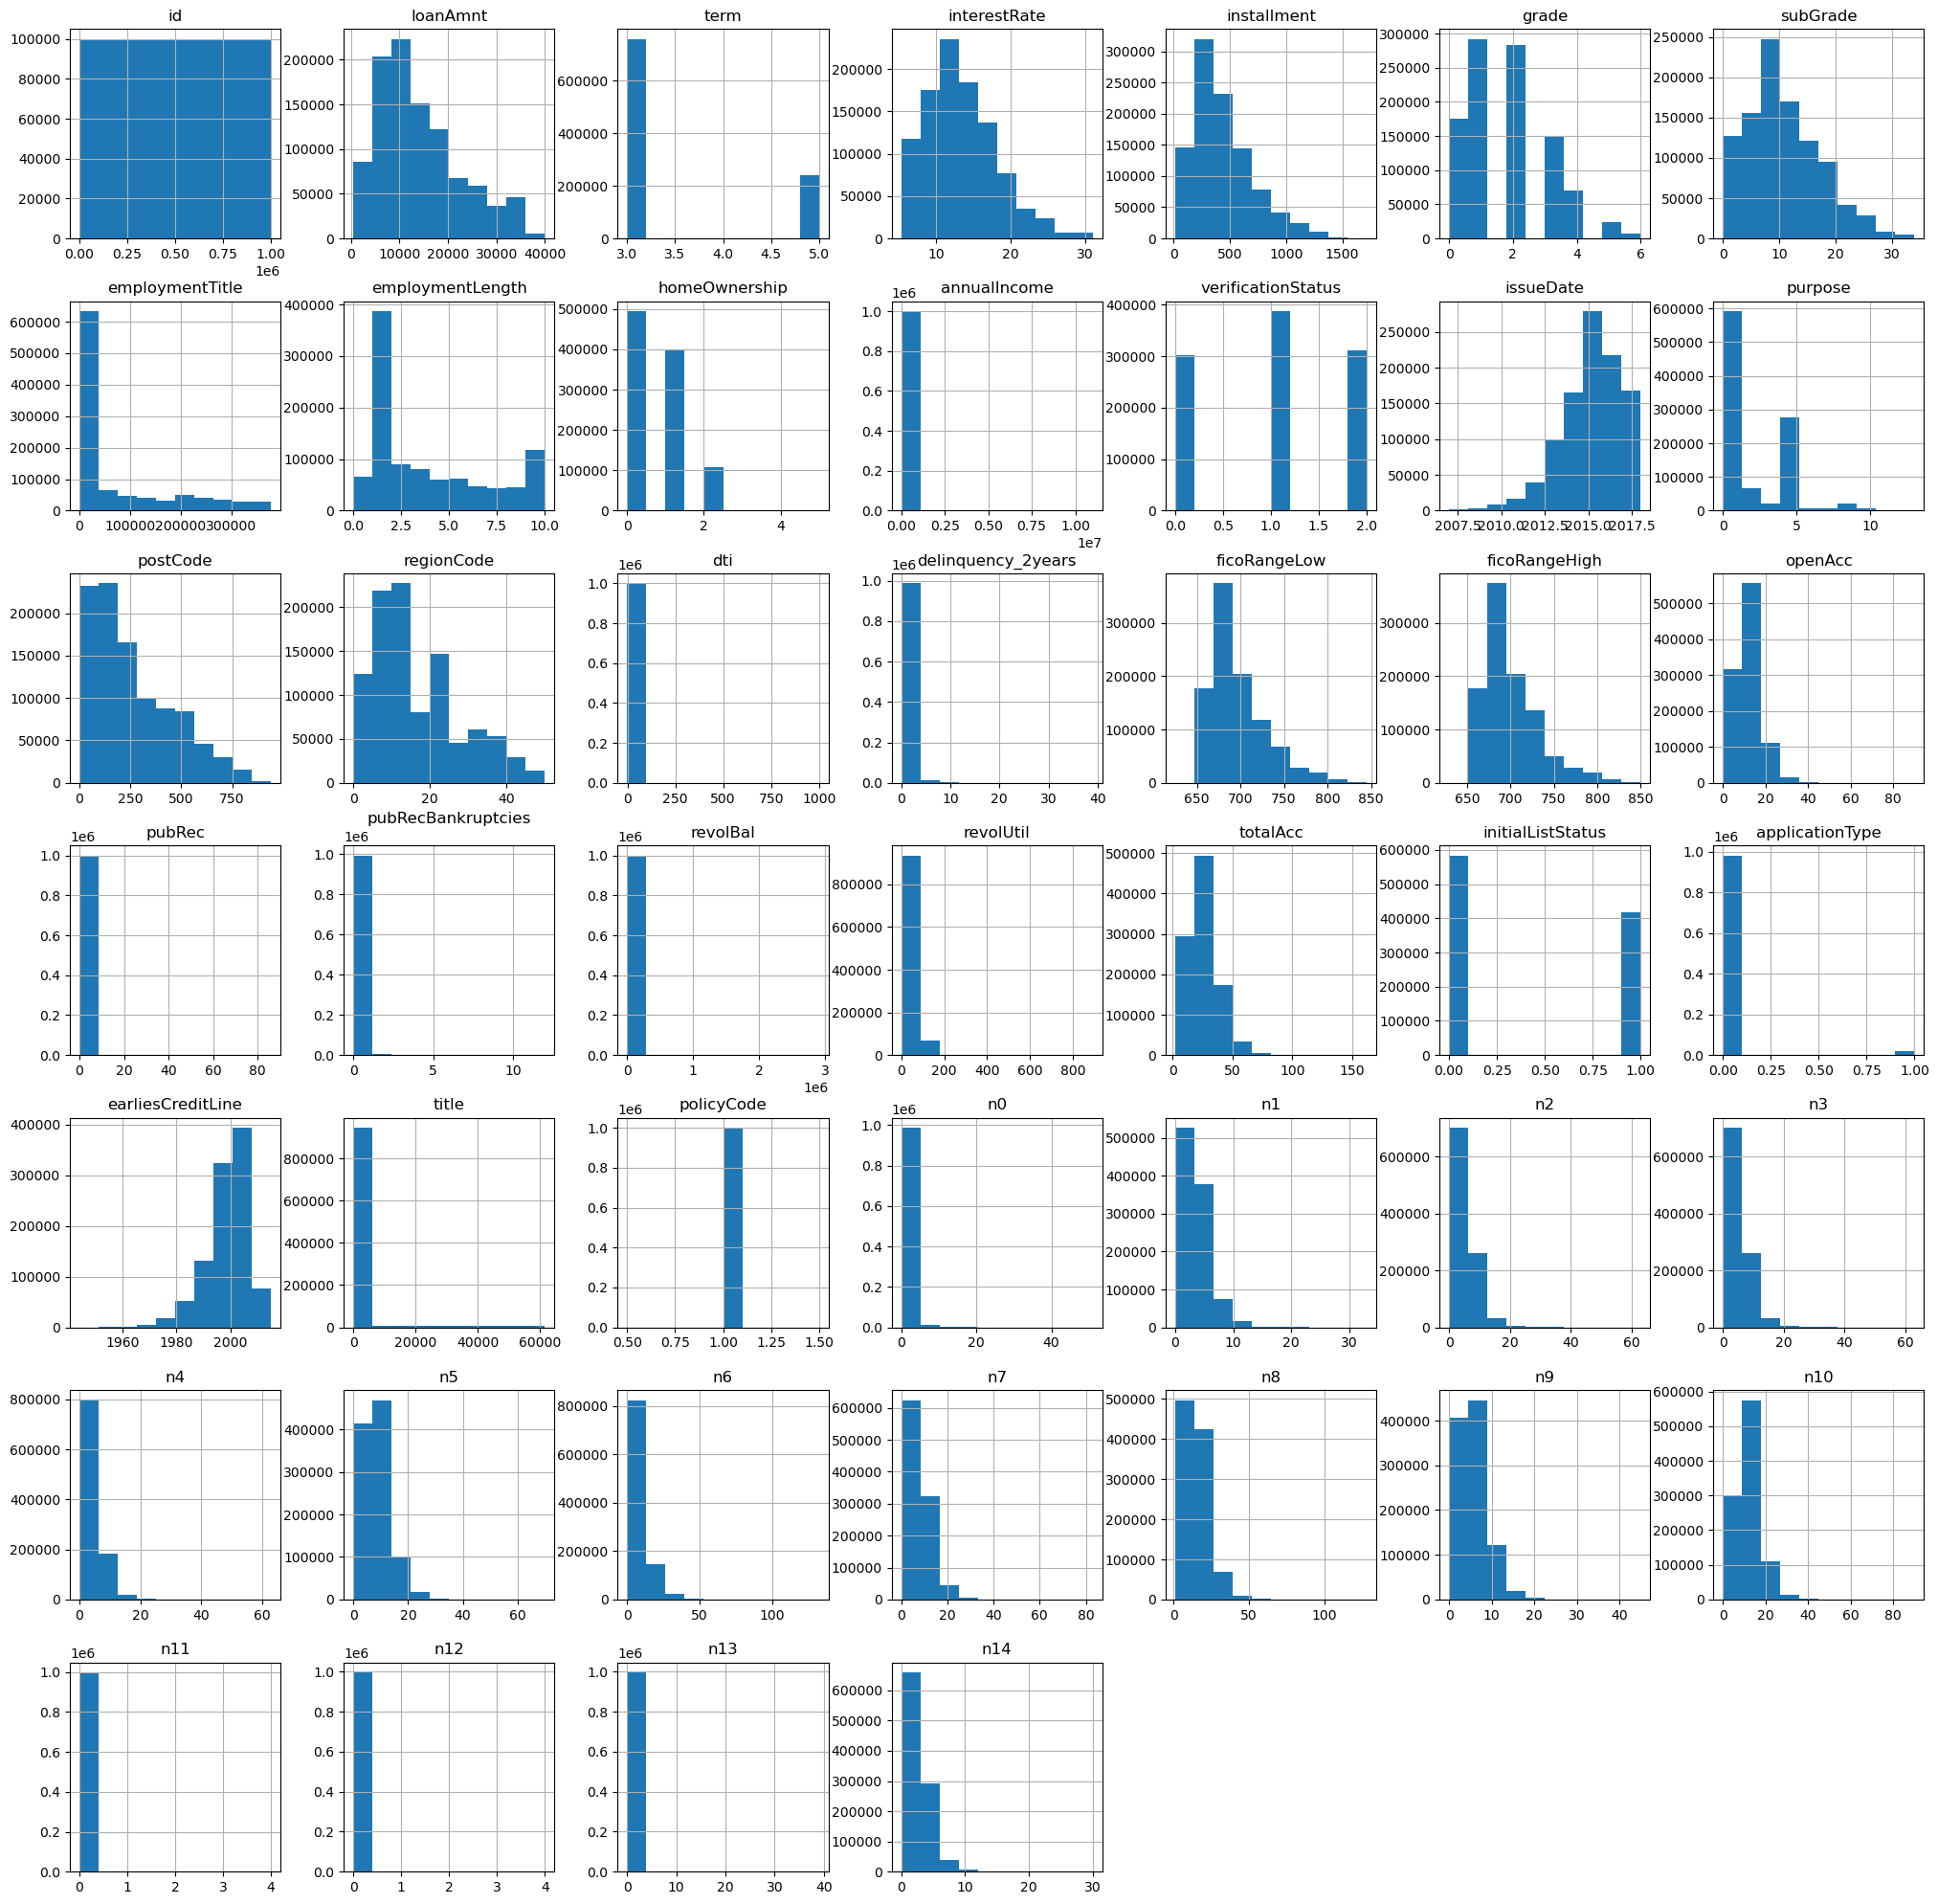

In [21]:
df.drop(columns='source').hist(figsize=(25, 25))

In [68]:
X_train = df.iloc[:800000].drop(columns=['source', 'id'])
X_test = df.iloc[800000:].drop(columns=['source', 'id'])

In [69]:
y_train = train['isDefault']

In [70]:
from sklearn.discriminant_analysis import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline


pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('log_reg', LogisticRegression())
])

In [71]:
from sklearn.model_selection import GridSearchCV


def getGrid(pipeline, param, X, y):
    grid = GridSearchCV(pipeline, param, cv=5, scoring='roc_auc')
    grid.fit(X, y)
    return grid

In [79]:
parm_grid = {
    # 'log_reg__penalty': ['l1', 'l2'],
    # 'log_reg__l1_ratio': np.arange(0.3, 0.81, 0.1),
    'log_reg__max_iter': [200, 500],
    # 'log_reg__C': [0.1, 0.5, 1],
    'log_reg__random_state': [42],
    'log_reg__n_jobs': [-1]
}

grid = getGrid(pipeline, parm_grid, X_train, y_train)

In [80]:
grid.best_params_

{'log_reg__max_iter': 200, 'log_reg__n_jobs': -1, 'log_reg__random_state': 42}

In [81]:
y_pred = grid.best_estimator_.predict(X_test)

In [82]:
submit = pd.read_csv('data/sample_submit.csv')

In [83]:
submit['isDefault'] = y_pred

In [84]:
submit.to_csv('out.csv', index=False)

In [85]:
from sklearn.metrics import roc_auc_score


roc_auc_score(y_train, grid.best_estimator_.predict(X_train))

0.532869246507408